In [3]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set() 



In [5]:
raw_data = pd.read_csv("D:\Subject\MLDL\Datasets\Dummies1.03.+.csv")
raw_data['Attendance'] = raw_data['Attendance'].map({'Yes':1,'No': 0}) 
raw_data.describe()


,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [6]:
y = raw_data['GPA']
x1 = raw_data[['SAT','Attendance']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.19e-15
Time:                        09:48:55   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

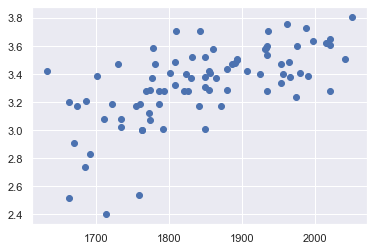

In [7]:
plt.scatter(raw_data['SAT'],y) 
yhat_no = 0.6439 + 0.0014*raw_data['SAT'] 
yhat_yes = 0.2226 + 0.0014*raw_data['SAT']


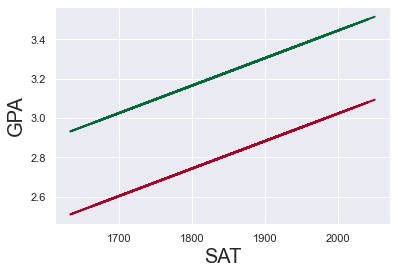

In [8]:
fig = plt.plot(raw_data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(raw_data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()


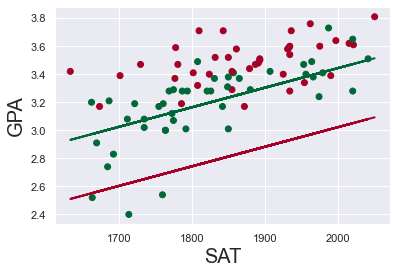

In [9]:
plt.scatter(raw_data['SAT'],y,c=raw_data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*raw_data['SAT']
yhat_yes = 0.2226 + 0.0014*raw_data['SAT']
fig = plt.plot(raw_data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(raw_data['SAT'],yhat_yes, lw=2, c='#a50026') 
plt.xlabel('SAT', fontsize = 20) 
plt.ylabel('GPA', fontsize = 20)
plt.show()


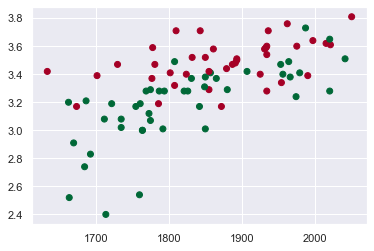

In [10]:
plt.scatter(raw_data['SAT'],raw_data['GPA'],
c=raw_data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*raw_data['SAT']
yhat_yes =0.2226 + 0.0014*raw_data['SAT']
yhat = 0.0017*raw_data['SAT'] + 0.275


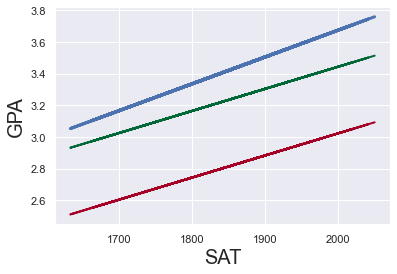

In [11]:
fig = plt.plot(raw_data['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(raw_data['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
fig = plt.plot(raw_data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()


In [13]:
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1921], 'Attendance': [0, 1]})
new_data = new_data[['const','SAT','Attendance']]
new_data
new_data.rename(index={0: 'Tom',1:'Jerry'})
predictions = results.predict(new_data)
predictions


0    3.023513
1    3.555513
dtype: float64

In [14]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0: 'Tom',1:'Jerry'})



,const,SAT,Attendance,Predictions
Tom,1,1700,0,3.023513
Jerry,1,1921,1,3.555513
